In [4]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogLocator, ScalarFormatter

In [5]:
# Parâmetros do range de N_c
Nc_values       = [50]  # Apenas N=50
parametros_gamma= ['gamma1', 'gamma2', 'gamma3', 'gamma4']
parametros_J    = ['JXX', 'JXY', 'JXZ', 'JYX', 'JYY', 'JYZ', 'JZX', 'JZY', 'JZZ']

# Armazenar todos os pontos individuais
all_gamma_points = {g: [] for g in parametros_gamma}
all_js_points    = []

for N in Nc_values:
    for i in range(5, 101):
        caminho     = f'C:/Users/Gubio/CODESACE/Pinn inverse for opem quantum system/No fields/data/parametro_nofields_N50_seed{i}_std0.02.csv'
        df          = pd.read_csv(caminho, index_col=0)
        valor_real  = df['treino'].str.strip('[]').astype(float) 
        valor_previsto = df['previsto'].str.strip('[]').astype(float) 
        erro_abs    = np.abs(valor_real - valor_previsto)**2

        for g in parametros_gamma:
            all_gamma_points[g].append(erro_abs[g])
        all_js_points.append(np.mean(erro_abs[parametros_J].to_numpy()))


<Figure size 2500x800 with 0 Axes>

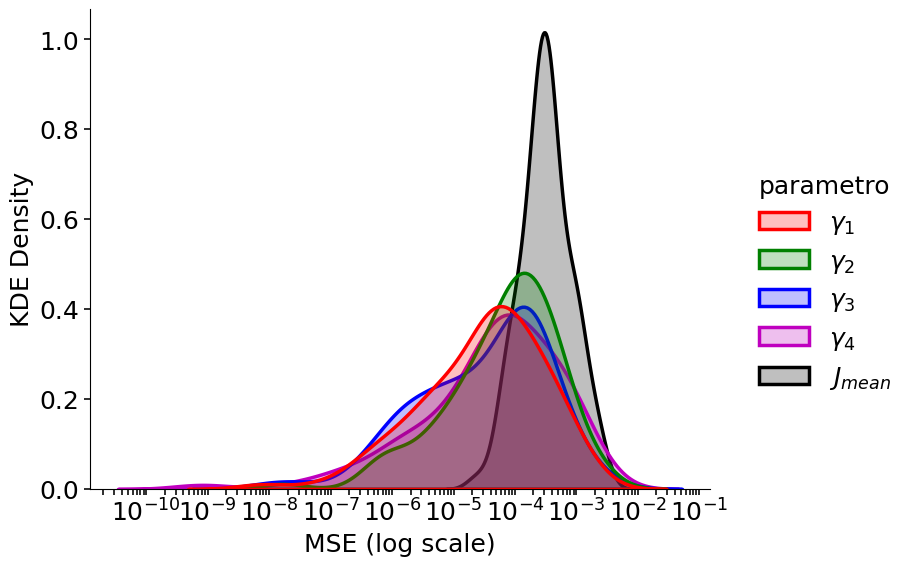

In [18]:
plt.figure(figsize=(25,8))
plt.rcParams.update({'font.size': 18})
# Labels LaTeX
parametros_gamma = [r'$\gamma_1$', r'$\gamma_2$', r'$\gamma_3$', r'$\gamma_4$']
parametros_J     = [r'$J_{mean}$']

# Criar DataFrame dos gammas
gamma_df = pd.DataFrame(all_gamma_points)
gamma_df.columns = parametros_gamma

# Criar DataFrame dos J
js_df = pd.DataFrame({'mse': all_js_points, 'parametro': parametros_J * len(all_js_points)})

# Converter gammas para formato longo
long_gamma = gamma_df.melt(var_name='parametro', value_name='mse')

# Concatenar os dois DataFrames
long_all = pd.concat([long_gamma, js_df], ignore_index=True)

# Definir paleta de cores: preto para J, cores fixas para os gammas
palette = {
    r'$J_{mean}$': "black",
    r'$\gamma_1$': "red",
    r'$\gamma_2$': "green",
    r'$\gamma_3$': "blue",
    r'$\gamma_4$': "m"  # magenta
}
g = sns.displot(
    data=long_all,
    x='mse',
    hue='parametro',
    kind='kde',
    fill=True,
    common_norm=False,
    log_scale=(True, False),
    height=6,    # altura
    aspect=1.3   # largura relativa (6 * 3.3 ≈ 20)
    ,palette=palette,
    linewidth=2.5   # <<< controla a espessura das linhas
)

for ax in g.axes.flat:
    ax.xaxis.set_major_locator(LogLocator(base=10.0, subs=None, numticks=1))
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs=range(1, 10), numticks=10))

plt.tick_params( axis='both', which='both', length=4, width=1.15)
plt.xlabel('MSE (log scale)')
plt.ylabel('KDE Density')
plt.savefig("KDE_density_nofields.pdf", dpi=500, bbox_inches='tight')
plt.show()

